<a href="https://colab.research.google.com/github/ipgub/TIF456/blob/main/nb/2025_CV_W02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import sys

# Additional library
import urllib.request


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading image from the web

In [3]:
imgurl01 = 'https://sipi.usc.edu/database/preview/misc/5.3.01.png' # male
imgurl02 = 'https://sipi.usc.edu/database/preview/misc/4.1.01.png' # female
req = urllib.request.urlopen(imgurl02)
arr = np.asarray(bytearray(req.read()), dtype = np.uint8)
testImg = cv2.imdecode(arr, -1) # load as it is
if testImg is None:
  print ('Could not open image file')
  sys.exit()

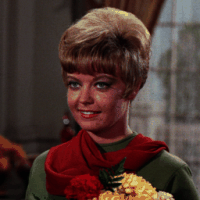

In [4]:
cv2_imshow(testImg)

In [5]:
testImg.dtype, testImg.shape

(dtype('uint8'), (200, 200, 3))

array([[[ 41,  45,  52],
        [ 35,  41,  49],
        [ 38,  43,  51],
        ...,
        [143, 135, 125],
        [137, 136, 127],
        [137, 136, 127]],

       [[ 41,  45,  52],
        [ 42,  43,  51],
        [ 41,  41,  53],
        ...,
        [143, 135, 125],
        [137, 136, 127],
        [137, 136, 127]],

       [[ 38,  43,  48],
        [ 42,  44,  49],
        [ 42,  43,  51],
        ...,
        [137, 136, 127],
        [137, 136, 127],
        [136, 130, 120]],

       ...,

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [ 44,  62,  60],
        [ 69,  80,  83],
        [ 88, 100, 109]],

       [[  5,   6,   8],
        [  7,  10,   9],
        [  5,   6,   8],
        ...,
        [ 38,  59,  55],
        [ 62,  79,  76],
        [ 97,  99,  99]],

       [[ 14,  17,  20],
        [ 12,  13,  19],
        [ 12,  13,  19],
        ...,
        [ 34,  52,  47],
        [ 55,  72,  69],
        [ 80,  96,  96]]], dtype=uint8)
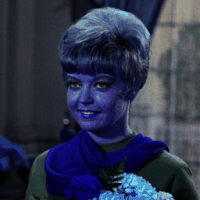

In [6]:
testImg

In [7]:
testImg[:,:,0], testImg[:,:,1], testImg[:,:,2]

(array([[ 41,  35,  38, ..., 143, 137, 137],
        [ 41,  42,  41, ..., 143, 137, 137],
        [ 38,  42,  42, ..., 137, 137, 136],
        ...,
        [  2,   2,   2, ...,  44,  69,  88],
        [  5,   7,   5, ...,  38,  62,  97],
        [ 14,  12,  12, ...,  34,  55,  80]], dtype=uint8),
 array([[ 45,  41,  43, ..., 135, 136, 136],
        [ 45,  43,  41, ..., 135, 136, 136],
        [ 43,  44,  43, ..., 136, 136, 130],
        ...,
        [  2,   2,   2, ...,  62,  80, 100],
        [  6,  10,   6, ...,  59,  79,  99],
        [ 17,  13,  13, ...,  52,  72,  96]], dtype=uint8),
 array([[ 52,  49,  51, ..., 125, 127, 127],
        [ 52,  51,  53, ..., 125, 127, 127],
        [ 48,  49,  51, ..., 127, 127, 120],
        ...,
        [  2,   2,   2, ...,  60,  83, 109],
        [  8,   9,   8, ...,  55,  76,  99],
        [ 20,  19,  19, ...,  47,  69,  96]], dtype=uint8))

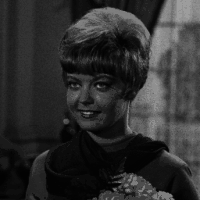

In [8]:
cv2_imshow(testImg[:,:,0])

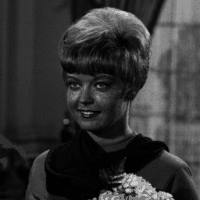

In [9]:
cv2_imshow(testImg[:,:,1])

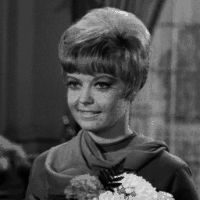

In [10]:
cv2_imshow(testImg[:,:,2])

## Reading Image from Drive

In [11]:
from google.colab import drive  # library for mounting google drive
drive.mount('/content/gdrive', force_remount=True)  # command to mount our google drive
import sys # library for adding path
sys.path.append('/content/gdrive/My Drive/DIP') # adding path where we save the DIP module

Mounted at /content/gdrive


In [12]:
!ls -l "/content/gdrive/My Drive/DIP"

total 8
-rw------- 1 root root 8170 Mar  3  2022 IPG-keybd.jpeg


In [13]:
myImg = cv2.imread('/content/gdrive/My Drive/DIP/IPG-keybd.jpeg', -1) # load as it is using full path name of img
if myImg is None:
  print ('Could not open image file')
  sys.exit()


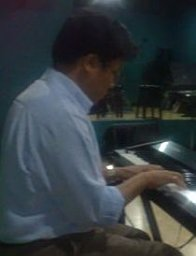

In [14]:
cv2_imshow(myImg)

In [15]:
print (type(myImg))
print (myImg.shape)
print (myImg.dtype)

<class 'numpy.ndarray'>
(256, 196, 3)
uint8


In [16]:
# Convert the image to grayscale
myImgGray = cv2.cvtColor(myImg,cv2.COLOR_BGR2GRAY)

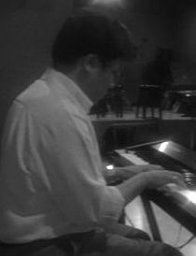

In [17]:
cv2_imshow(myImgGray)

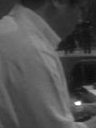

In [18]:
cv2_imshow(myImgGray[64:192,32:128])

## Inverse Image

$$
\hat{I}(x,y) = \max - I(x,y)
$$

In [19]:
imgHeight = myImgGray.shape[0]
imgWidth = myImgGray.shape[1]

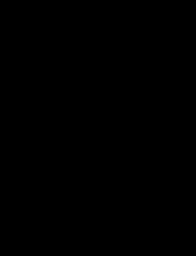

In [20]:
invImg = 0 * np.ones((imgHeight,imgWidth), np.uint8)  # can also used np.zeros
cv2_imshow(invImg)

In [21]:
for row in range(imgHeight):
  for col in range(imgWidth):
    invImg[row,col] = 255 - myImgGray[row,col]

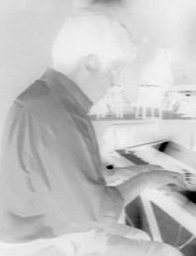

In [22]:
cv2_imshow(invImg)

## Splitting image into colored channel

In [23]:
B, G, R = cv2.split(myImg)

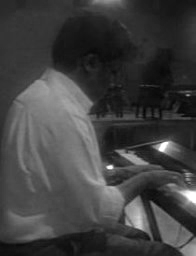

In [24]:
cv2_imshow(B)

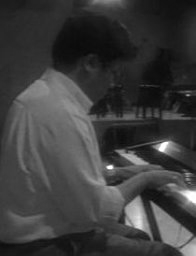

In [25]:
cv2_imshow(G)

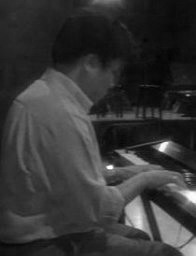

In [26]:
cv2_imshow(R)

In [27]:
nullImg = np.zeros((imgHeight,imgWidth), np.uint8)

In [28]:
B_channel = cv2.merge((B,nullImg,nullImg))
G_channel = cv2.merge((nullImg,G,nullImg))
R_channel = cv2.merge((B,G,R))

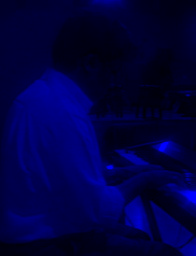

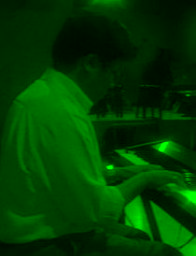

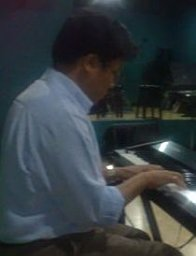

In [29]:
cv2_imshow(B_channel)
cv2_imshow(G_channel)
cv2_imshow(R_channel)

## Image Thresholding

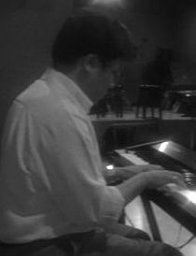

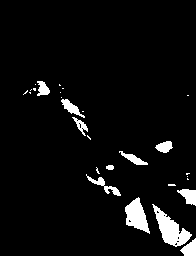

(None, None, 128.0)

In [30]:
thr, binaryImg = cv2.threshold(myImgGray, 128 , 255,cv2.THRESH_BINARY)
cv2_imshow(myImgGray),cv2_imshow(binaryImg),thr

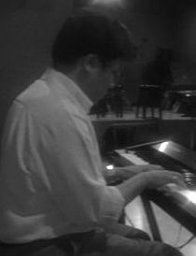

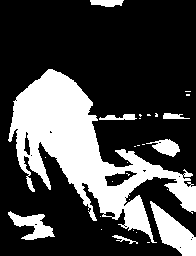

(None, None)

In [31]:
thr, binaryImg = cv2.threshold(myImgGray, 128, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(myImgGray),cv2_imshow(binaryImg)

## Create Image

### Gradation

In [32]:
# Create null image first
imgHeight = 256
imgWidth = 256
createImgA = np.zeros((imgHeight,imgWidth), np.uint8)
for row in range(imgHeight):
  for col in range(imgWidth):
    createImgA [row,col] = max(0, col - 1)

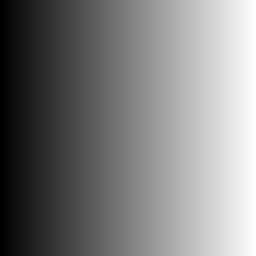

In [33]:
cv2_imshow(createImgA)

### Circle

In [34]:
# Create null image first
imgHeight = 256
imgWidth = 256
frame_radius = 90
createImgB = np.zeros((imgHeight,imgWidth), np.uint8)
for row in range(imgHeight):
  for col in range(imgWidth):
    dist = np.sqrt((row - 2 * imgHeight/4 )**2 + (col - 2*imgWidth/4)**2)
    if dist < frame_radius:
      createImgB [row,col] = 255
    else:
      createImgB [row,col] = 0



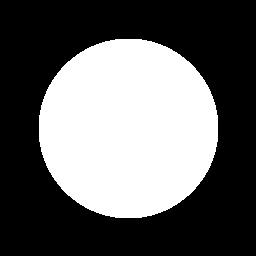

In [35]:
cv2_imshow(createImgB)

### Combined

In [36]:
# Create null image first
imgHeight = 256
imgWidth = 256
createImgC = np.zeros((imgHeight,imgWidth), np.uint8)
for row in range(imgHeight):
  for col in range(imgWidth):
    createImgC [row,col] = int(createImgA [row,col]) * int(createImgB[row,col]) / 255

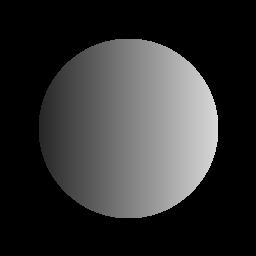

In [37]:
cv2_imshow(createImgC)